In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
import missingno as mso

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


In [2]:
# Import data from github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/gender_submission.csv')

print("Full train dataset shape is {}".format(df_train.shape))
df_train.head(3)

Full train dataset shape is (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Explore dataframe
df_train.info()
print('')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

<Axes: >

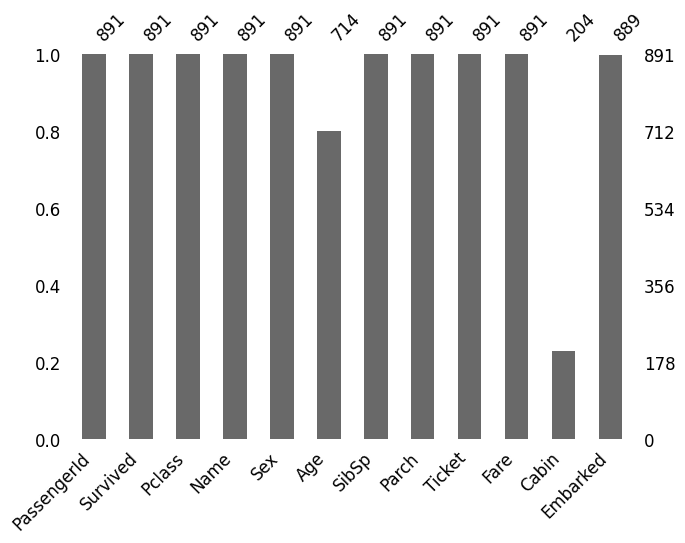

In [4]:
# Missing values in df_train
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

<Axes: >

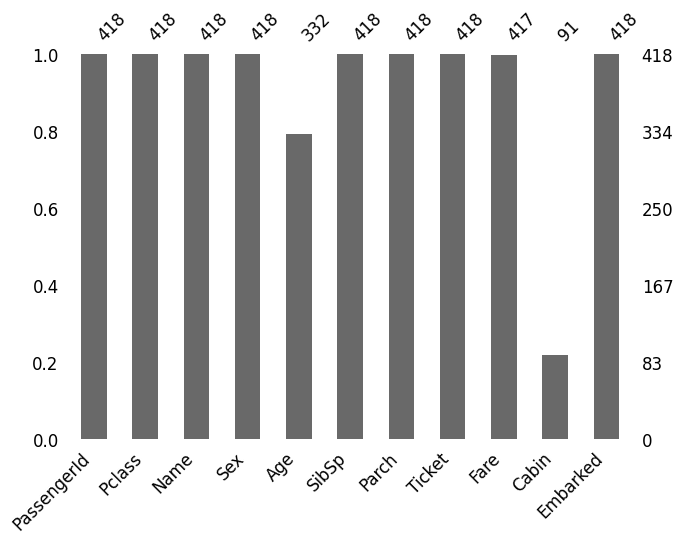

In [5]:
# Missing values in df_test
plt.figure(figsize=(16,5))
ax_test = plt.subplot(1,2,2)
mso.bar(df_test,ax=ax_test,fontsize = 12)

In [6]:
# Preprocessing

# Definir output (y_train)
y_train = df_train["Survived"]

# Definir inputs
input_features = list(df_train.columns)
# Suppression des inputs PassengerId, Name, Ticket, Cabin, Embarked, Survived, Fare
input_features.remove("PassengerId")
input_features.remove("Name")
# input_features.remove("Age")
input_features.remove("Ticket")
input_features.remove("Cabin")
input_features.remove("Embarked")
input_features.remove("Survived")
# input_features.remove("Fare")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
# Retraitement de la colonne Age : remplacer les valeurs manquantes par la moyenne
mean_age = round(df_train['Age'].mean(), 0)
df_train['Age'] = df_train['Age'].fillna(mean_age)
df_test['Age'] = df_test['Age'].fillna(mean_age)

# Retraitement de la colonne Fare : remplacer les valeurs manquantes par la moyenne
mean_fare = round(df_train['Fare'].mean(), 0)
df_train['Fare'] = df_train['Fare'].fillna(mean_fare)
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [8]:
# Retraitement de la colonne Sex : remplacer male par 0 et female par 1
label_encoder_sex = LabelEncoder()
df_train['Sex'] = label_encoder_sex.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder_sex.fit_transform(df_test['Sex'])

In [9]:
# Definition du dataframe x_train pour l'entrainement du modèle
x_train = df_train[input_features]

# Definition du dataframe x_test
x_test = df_test[input_features]

x_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250


In [10]:
# Ne pas executer

# import seaborn as sns
# top_features = df_train.corr()[['Survived']].sort_values(by=['Survived'],ascending=False).head(30)
# plt.figure(figsize=(5,10))
# sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [11]:
# Ne pas executer

# # Standardiser les donnees
# # sc = StandardScaler()
# # sc = RobustScaler()
# sc = MinMaxScaler()
# x_train = sc.fit_transform(x_train)
# # x_test = sc.fit_transform(x_test)

# x_train

       Pclass       Sex       Age     SibSp     Parch      Fare
0    0.827377  0.737695 -0.597055  0.432793 -0.473674 -0.502445
1   -1.566107 -1.355574  0.634162  0.432793 -0.473674  0.786845
2    0.827377 -1.355574 -0.289251 -0.474545 -0.473674 -0.488854
3   -1.566107 -1.355574  0.403309  0.432793 -0.473674  0.420730
4    0.827377  0.737695  0.403309 -0.474545 -0.473674 -0.486337
..        ...       ...       ...       ...       ...       ...
886 -0.369365  0.737695 -0.212299 -0.474545 -0.473674 -0.386671
887 -1.566107 -1.355574 -0.827908 -0.474545 -0.473674 -0.044381
888  0.827377 -1.355574  0.018554  0.432793  2.008933 -0.176263
889 -1.566107  0.737695 -0.289251 -0.474545 -0.473674 -0.044381
890  0.827377  0.737695  0.172456 -0.474545 -0.473674 -0.492378

[891 rows x 6 columns]


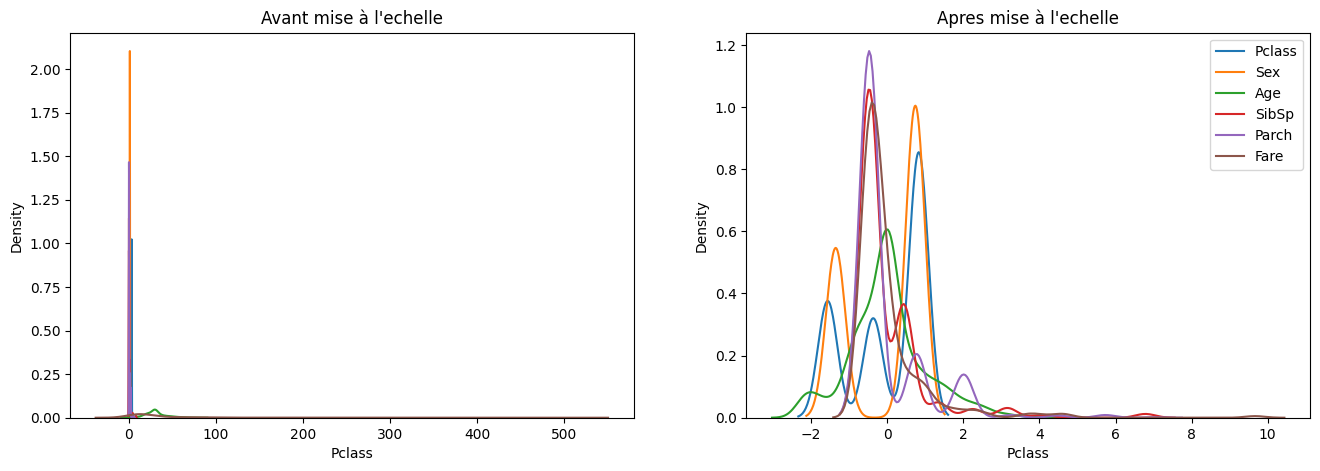

In [12]:
# Presentation des effets du scaler sur les inputs (seulement pour information, la procédure est realisée plus bas)

import seaborn as sns

def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    list_columns = pdf.columns
    plt.legend(list_columns)
    plt.show()

# scaler = MaxAbsScaler()
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
keepCols = input_features
scaled_df = scaler.fit_transform(df_train[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
print(scaled_df)
plotGraph(df_train[keepCols], scaled_df)

Epoch 1/100
30/30 [==============================] - 3s 28ms/step - loss: 0.6800 - accuracy: 0.5520 - val_loss: 0.6548 - val_accuracy: 0.6000
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 0.6690 - accuracy: 0.5856 - val_loss: 0.6460 - val_accuracy: 0.6169
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6643 - accuracy: 0.5923 - val_loss: 0.6410 - val_accuracy: 0.6203
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6601 - accuracy: 0.5973 - val_loss: 0.6363 - val_accuracy: 0.6271
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6561 - accuracy: 0.6023 - val_loss: 0.6313 - val_accuracy: 0.6339
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6074 - val_loss: 0.6265 - val_accuracy: 0.6339
Epoch 7/100
30/30 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.6074 - val_loss: 0.6216 - val_accuracy: 0.6339
Epoch 8/10

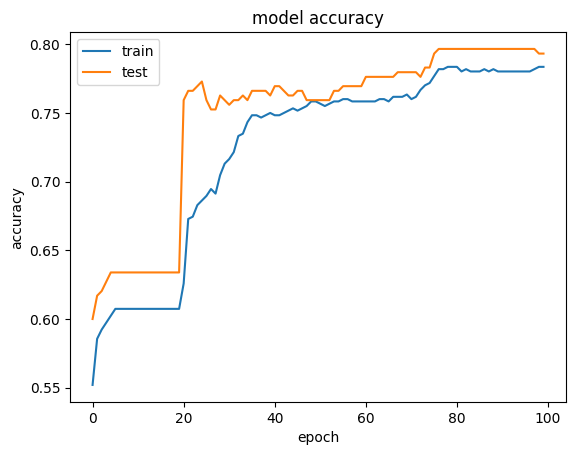

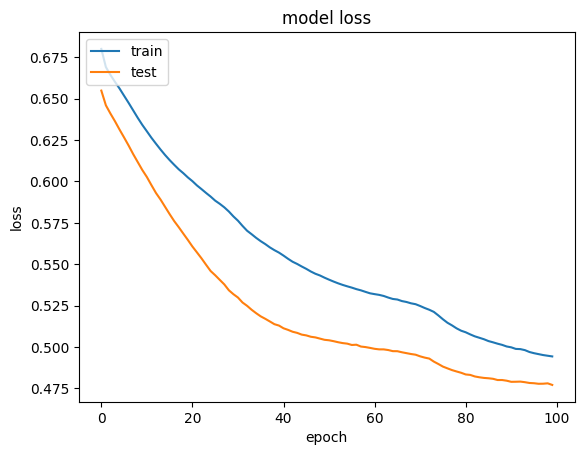

In [13]:
# Mise a l'echelle de x_train et x_test
# sc = MaxAbsScaler()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)


# Creation du modele
classifier_model = tf.keras.Sequential()

#Input layer with 6 inputs neurons
classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu', input_dim = 6))
# #Input layer with 5 inputs neurons
# classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu', input_dim = 5))
# #Input layer with 5 inputs neurons
# classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 5))

# Hidden layer
# classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))

# #Hidden layer
# classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))

# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# #output layer with 1 output neuron which will predict 1 or 0
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainement du modele
history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 20, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 15, epochs = 100, shuffle=True)
# history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100, shuffle=True)
# classifier_model.fit(x_train, y_train, batch_size = 10, epochs = 100)



# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [14]:
# Tester le modele sur le dataframe de test

# Il faudra ajouter une etape inverse_transform en cas de nouvelles données non transformées par StandardScaler()



prediction = classifier_model.predict(x_test).tolist()
# list to series
se = pd.Series(prediction)
# creating new column of predictions in data_check dataframe
df_check['check'] = se
df_check['check'] = df_check['check'].str.get(0)


series = []
for val in df_check.check:
    if val >= 0.5:
        series.append(1)
    else:
        series.append(0)
df_check['final'] = series
print('')
print(df_check)



match = 0
nomatch = 0
for val in df_check.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1
print('')
# print(match)
# print(nomatch)
print(f"Predictions correctes: {match} ({round(match/(match+nomatch)*100,2)}%)")
print(f"Predictions incorrectes: {nomatch}")

14/14 [==============================] - 0s 2ms/step

     PassengerId  Survived     check  final
0            892         0  0.102796      0
1            893         1  0.676895      1
2            894         0  0.057342      0
3            895         0  0.137844      0
4            896         1  0.676895      1
..           ...       ...       ...    ...
413         1305         0  0.122449      0
414         1306         1  0.676895      1
415         1307         0  0.087414      0
416         1308         0  0.122449      0
417         1309         0  0.117348      0

[418 rows x 4 columns]

Predictions correctes: 413 (98.8%)
Predictions incorrectes: 5
